In [228]:
import vega; print(vega.__version__)
import pandas as pd
from functools import reduce

3.4.0


In [155]:
persons_with_connexions = [0, 27, 34, 37, 39, 40, 41, 43, 45, 47, 56, 57, 58, 63, 65, 66, 67]

In [194]:
persons_connexion_or_travel = [0, 65, 66, 67, 73, 74, 75, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 27, 34, 37, 39, 40, 41, 43, 45, 47, 56, 57, 58, 63]

## Load distances

In [200]:
path = '/home/apister/bigGraph/'

demos_fp = path + 'bigGraph_demographics_distance.csv'
travels_fp = path + 'bigGraph_travel_similarity.csv'
gl_fp_0_undir5 = path + 'bigGraph_gl_0_undir5.csv'
gl_fp_1_undir5 = path + 'bigGraph_gl_1_undir5.csv'

In [204]:
demos_distance = pd.read_csv(demos_fp)
travels_distance = pd.read_csv(travels_fp)
gl_0_distances = pd.read_csv(gl_fp_0_undir5)
gl_1_distances = pd.read_csv(gl_fp_1_undir5)

In [218]:
gl_0_distances = gl_0_distances.rename(columns={"graphletSimilarity": "gl0_similarity"})

In [214]:
gl_1_distances = gl_1_distances.rename(columns={"graphletSimilarity": "gl1_similarity"})

In [219]:
gl_1_distances.head()

TemplateNode  PersonNode  gl1_similarity
0             0      456759        0.571429
1             0      456760        0.904762
2             0      456761        0.952381
3             0      456762        0.809524
4             0      456765        0.714286

In [220]:
gl_0_distances.head()

TemplateNode  PersonNode  gl0_similarity
0             0      456759        0.857143
1             0      456760        0.761905
2             0      456761        0.952381
3             0      456762        0.714286
4             0      456765        0.809524

In [231]:
df_merge = reduce(lambda left,right: pd.merge(left,right,on=['TemplateNode', 'PersonNode']),
                  [demos_distance, travels_distance, gl_0_distances, gl_1_distances])

In [232]:
df_merge

TemplateNode  PersonNode  NumMatch    Cosine   Pearson  nTripTemplate  \
0                 39      456759        15  0.650740  0.273540              4   
1                 39      456760        10  0.662947  0.420277              4   
2                 39      456761        13  0.816962  0.724931              4   
3                 39      456773        12  0.828918  0.697591              4   
4                 39      456774        14  0.849159  0.790273              4   
...              ...         ...       ...       ...       ...            ...   
150562            41      657648        14  0.527640  0.320423              4   
150563            41      657658        16 -0.542168 -0.198738              4   
150564            41      657661        13  0.904577  0.715935              4   
150565            41      657662        15 -0.731589 -0.463133              4   
150566            41      657664        13 -0.107796  0.219977              4   

        nTripPerson  travelJaccard  gl0_similarity  gl1_similarity  
0                 8       0.090909        0.857143        0.571429  
1                 3       0.000000        0.714286        0.904762  
2                 2       0.200000        0.904762        0.952381  
3                 8       0.090909        0.380952        0.000000  
4                 2       0.200000        0.380952        0.380952  
...             ...            ...             ...             ...  
150562            6       0.111111        0.809524        0.857143  
150563            7       0.100000        0.571429        0.000000  
150564            7       0.000000        0.809524        0.000000  
150565            4       0.142857        0.809524        0.761905  
150566            3       0.000000        0.380952        0.476190  

[150567 rows x 10 columns]

### Edge list

In [245]:
template_edges = pd.read_csv("../../data/CGCS-Template.csv")
template_edges = template_edges[template_edges['eType'].isin([0,1])]
template_edges.head()

Source  eType  Target    Time  Weight  SourceLocation  TargetLocation  \
1      41      0      34   86400       1             NaN             NaN   
2      37      0      27   94461       1             NaN             NaN   
3      34      1      27  107548       1             5.0             5.0   
4      41      0      37  127838       1             NaN             NaN   
5      34      1      37  137358       1             5.0             5.0   

   SourceLatitude  SourceLongitude  TargetLatitude  TargetLongitude  
1             NaN              NaN             NaN              NaN  
2             NaN              NaN             NaN              NaN  
3             NaN              NaN             NaN              NaN  
4             NaN              NaN             NaN              NaN  
5             NaN              NaN             NaN              NaN

In [246]:
candidate_edges = pd.read_csv('../../python/extracted_matchs_seed/seed1/match_gl0undir5_greedy.csv')
candidate_edges = candidate_edges[candidate_edges['eType'].isin([0,1])]
candidate_edges.head()

Unnamed: 0  Source  eType  Target      Time  Weight  SourceLocation  \
0        3427  456761      0  462278  27703691     1.0              -1   
1        3481  456761      1  463267  19810595     1.0               4   
2        3922  456761      0  457395  22323977     1.0              -1   
3      154007  457002      1  457203  27773305     1.0               3   
4      154404  457002      1  461119  24489023     1.0               3   

   TargetLocation  SourceLatitude  SourceLongitude  TargetLatitude  \
0              -1             NaN              NaN             NaN   
1               5         5.73393          -164.85         22.8376   
2              -1             NaN              NaN             NaN   
3               1       -25.35000          -112.53        -27.4317   
4               1       -25.35000          -112.53        -29.4274   

   TargetLongitude  
0              NaN  
1         158.3280  
2              NaN  
3         -12.4960  
4         -16.8498

### Node list

In [247]:
template_nodes = pd.read_csv("../../data/CGCS-Template-NodeTypes.csv")
template_nodes = template_nodes[template_nodes['NodeType'] == 1]
template_nodes.head()

NodeID  NodeType
1       0         1
2       2         1
3      27         1
4      29         1
5      31         1

In [248]:
template_nodes.dtypes

NodeID      int64
NodeType    int64
dtype: object

In [249]:
candidate_nodes_all = pd.read_csv("../../data/CGCS-GraphData-NodeTypes.csv")
candidate_nodes_all = candidate_nodes_all[candidate_nodes_all['NodeType'] == 1]
candidate_nodes_all.head()

NodeID  NodeType
0  477769         1
1  572500         1
2  500192         1
3  480268         1
4  516694         1

### Pairing

In [250]:
import json
def dict_to_df_matching(path):
    with open(path, 'r') as f:
        pairing = json.load(f)

    df = pd.DataFrame({'templateID': [int(n) for n in pairing.keys()], 'candidateID': [int(n) for n in pairing.values()]})
    return df

In [251]:
pairing = dict_to_df_matching('../../python/extracted_matchs_seed/seed1/match_gl0undir5_greedy.json')
pairing.head()

templateID  candidateID
0           0       461119
1          39       457002
2          40       457203
3          65       457395
4          66       456761

In [252]:
categories = pd.read_csv("../../data/DemographicCategories.csv")

In [253]:
distances = pd.DataFrame(columns=["templateID", "candidateID", "templateType", "candidateType"])

In [254]:
candidate_nodes = candidate_nodes_all[candidate_nodes_all['NodeID'].isin(pairing['candidateID'])]

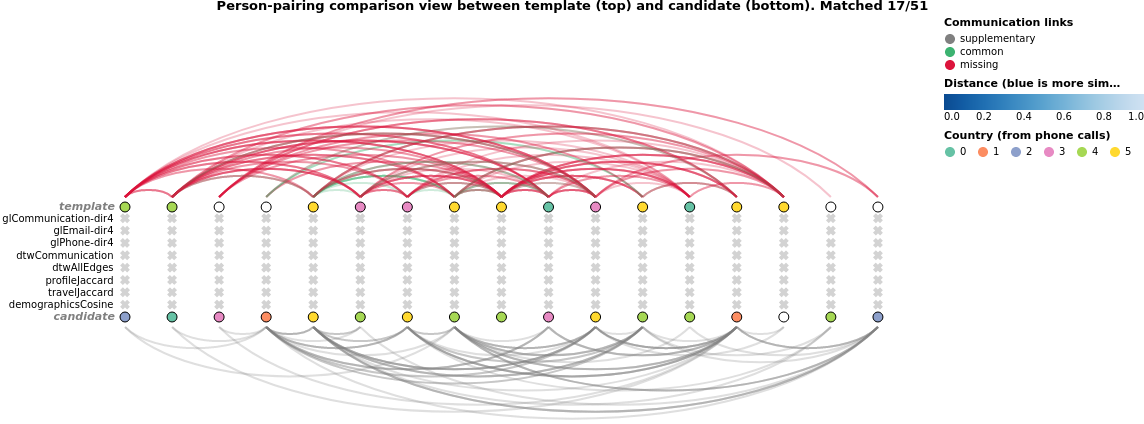

In [255]:
from process import view

# Loading the rest of the data
# candidate_edges =  pd.read_csv("../vis/data/candidate_nodes_1.csv")
# candidate_nodes =  pd.read_csv("../vis/data/candidate_edges_glEmail-dir4_1.csv")

view(template_edges, template_nodes, candidate_edges, candidate_nodes, pairing, distances, categories)

## graphlets undir5 0-1

In [132]:
candidate_edges = pd.read_csv('../../python/extracted_matchs_seed/seed1/match_glundir5_greedy.csv')
candidate_edges = candidate_edges[candidate_edges['eType'].isin([0,1])]
candidate_edges.head()

Unnamed: 0  Source  eType  Target      Time  Weight  SourceLocation  \
0        4276  456761      1  508659  13584193     1.0               4   
1      154478  457002      0  545211  21357377     1.0              -1   
2      186651  457058      1  464993   3724342     1.0               2   
3      187399  457058      1  464993  13756378     1.0               2   
4      188214  457058      1  475890   9207290     1.0               2   

   TargetLocation  SourceLatitude  SourceLongitude  TargetLatitude  \
0               1         5.73393        -164.8500       -30.37080   
1              -1             NaN              NaN             NaN   
2               4       -20.04320          91.2884        -3.05257   
3               4       -20.04320          91.2884        -3.05257   
4               5       -20.04320          91.2884        23.76590   

   TargetLongitude  
0         -12.6149  
1              NaN  
2        -163.5310  
3        -163.5310  
4         152.1530

In [133]:
pairing = dict_to_df_matching('../../python/extracted_matchs_seed/seed1/match_glundir5_greedy.json')
pairing.head()

templateID  candidateID
0           0       475890
1          39       458511
2          57       483282
3          40       592124
4          37       508659

In [134]:
candidate_nodes = candidate_nodes_all[candidate_nodes_all['NodeID'].isin(pairing['candidateID'])]

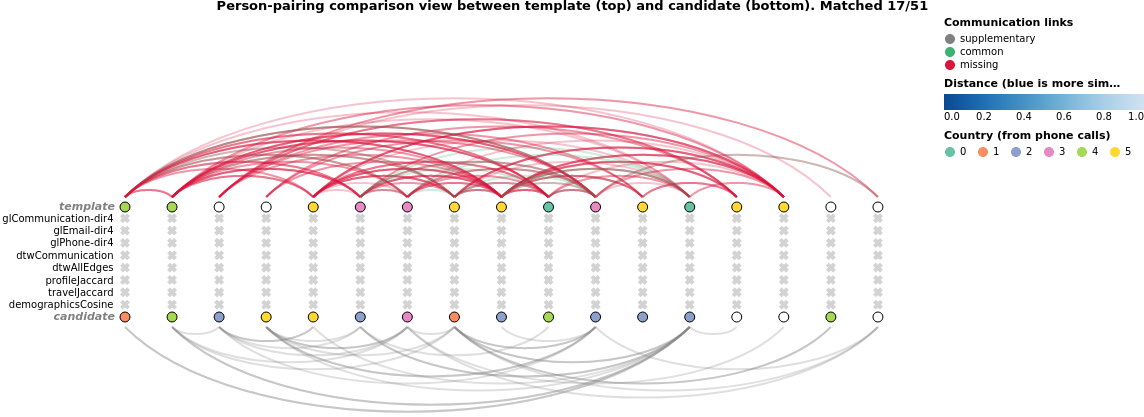

In [135]:
view(template_edges, template_nodes, candidate_edges, candidate_nodes, pairing, distances, categories)

### Pairing travel - demographics

In [170]:
candidate_edges = pd.read_csv('../../python/extracted_matchs_seed/seed1/match_travels_demographics_greedy2.csv')
candidate_edges = candidate_edges[candidate_edges['eType'].isin([0,1])]
candidate_edges.head()

Unnamed: 0  Source  eType  Target      Time  Weight  SourceLocation  \
0      453729  457397      1  634303  29237760     1.0               4   
1      660072  457699      0  652002  16862086     1.0              -1   
2      660554  457699      1  599441  15827181     1.0               2   
3     1867881  459691      1  646838   2953448     1.0               4   
4     1868109  459691      0  634303   1216834     1.0              -1   

   TargetLocation  SourceLatitude  SourceLongitude  TargetLatitude  \
0               5         5.26273        -167.8530        19.10530   
1              -1             NaN              NaN             NaN   
2               4       -22.95650          90.5714         2.74785   
3               3         3.22577        -166.6530       -25.02190   
4              -1             NaN              NaN             NaN   

   TargetLongitude  
0          156.866  
1              NaN  
2         -162.275  
3         -111.070  
4              NaN

In [171]:
pairing = dict_to_df_matching('../../python/extracted_matchs_seed/seed1/match_travels_demographics_greedy2.json')
#pairing.head()

In [172]:
candidate_nodes = candidate_nodes_all[candidate_nodes_all['NodeID'].isin(pairing['candidateID'])]

In [173]:
len(candidate_nodes)

49

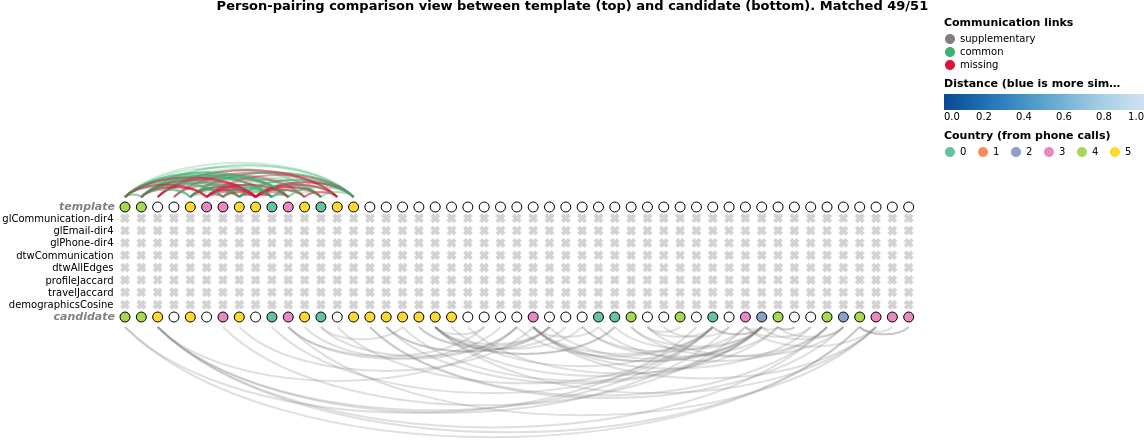

In [174]:
view(template_edges, template_nodes, candidate_edges, candidate_nodes, pairing, distances, categories)

In [175]:
p2 = pairing[pairing['templateID'].isin(persons_with_connexions)]
view(template_edges, template_nodes, candidate_edges, candidate_nodes, p2, distances, categories)

In [176]:
p2 = pairing[pairing['templateID'].isin(persons_connexion_or_travel)]
view(template_edges, template_nodes, candidate_edges, candidate_nodes, p2, distances, categories)

### Pairing travels - demo - graphlets

In [178]:
candidate_edges = pd.read_csv('../../python/extracted_matchs_seed/seed1/match_travels_demographics_glundir5_greedy.csv')
candidate_edges = candidate_edges[candidate_edges['eType'].isin([0,1])]
candidate_edges.head()

Unnamed: 0  Source  eType  Target      Time  Weight  SourceLocation  \
0        2759  456761      0  585661  17040971     1.0              -1   
1        3607  456761      0  568093   7609923     1.0              -1   
2      154386  457002      0  516801  24293228     1.0              -1   
3      155130  457002      0  564617   5910488     1.0              -1   
4      155900  457002      1  479204  11236372     1.0               3   

   TargetLocation  SourceLatitude  SourceLongitude  TargetLatitude  \
0              -1             NaN              NaN             NaN   
1              -1             NaN              NaN             NaN   
2              -1             NaN              NaN             NaN   
3              -1             NaN              NaN             NaN   
4               0          -25.35          -112.53         39.3313   

   TargetLongitude  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4         -40.6437

In [191]:
pairing = dict_to_df_matching('../../python/extracted_matchs_seed/seed1/match_travels_demographics_glundir5_greedy.json')

In [189]:
candidate_nodes = candidate_nodes_all[candidate_nodes_all['NodeID'].isin(pairing['candidateID'])]

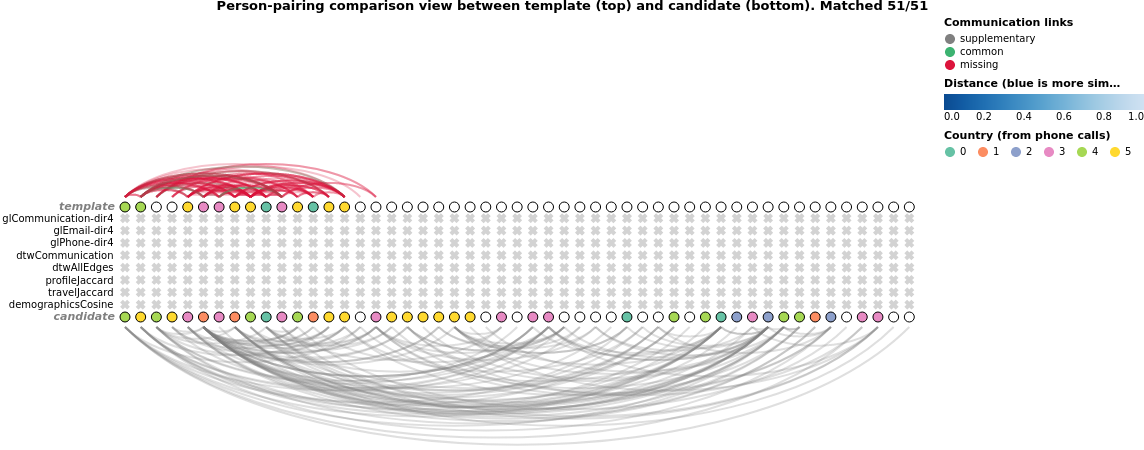

In [190]:
view(template_edges, template_nodes, candidate_edges, candidate_nodes, pairing, distances, categories)

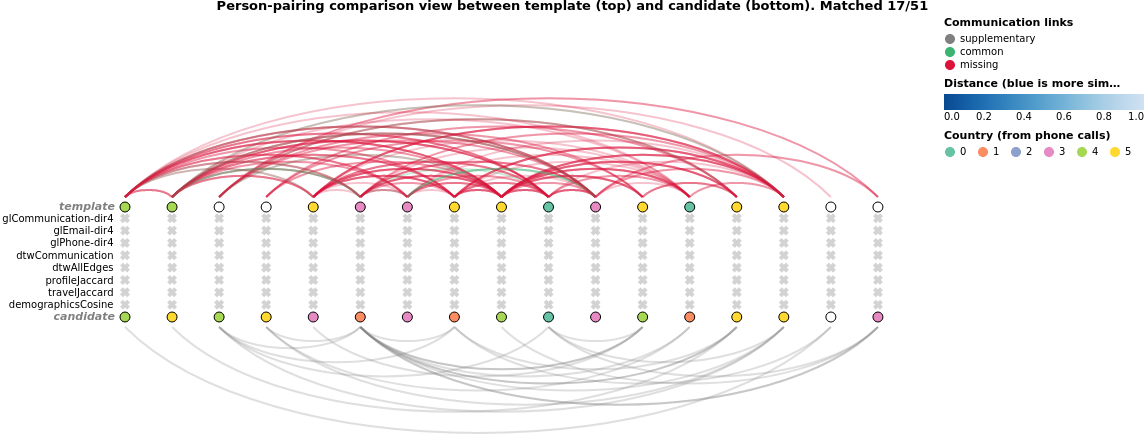

In [192]:
p2 = pairing[pairing['templateID'].isin(persons_with_connexions)]
view(template_edges, template_nodes, candidate_edges, candidate_nodes, p2, distances, categories)